In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report


file_path = '/content/Dataset_OSCC (2) (1) (1).xlsx'
data = pd.read_excel(file_path)

data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Sl No                                    112 non-null    int64 
 1   AGE                                      112 non-null    int64 
 2   SEX                                      112 non-null    object
 3   SITE                                     112 non-null    object
 4   Duration                                 112 non-null    object
 5   cT                                       112 non-null    object
 6   cN                                       112 non-null    object
 7   pT                                       112 non-null    object
 8   pN                                       112 non-null    object
 9    (surgery is compulsory for all ) RT/CT  112 non-null    object
 10  DEGREE OF DIFFERENTIATION                112 non-null    objec

(None,
    Sl No   AGE  SEX                               SITE         Duration  cT  \
 0       1    52   F                 Ca left lower lip            8 days  T2   
 1       2    44   M          Ca left commisure of lip            8 days  T1   
 2       3    44   M  Ca right lateral border of tongue          11 days  T4   
 3       4    50   F  Ca right lateral border of tongue          04 days  T2   
 4       5    27   M  Ca right Lateral border of tongue  1 month 16 days  T1   
 
    cN  pT  pN  (surgery is compulsory for all ) RT/CT  \
 0  N0  T2  N0                      surgery / No RT/CT   
 1  N0  T1  N0                                      No   
 2  NO  T2  N0                                      No   
 3  N1  T2  N0                                      No   
 4  N1  T1  N0                                RT & CT    
 
   DEGREE OF DIFFERENTIATION Pathologic group Stage  Recurrence  
 0                     MDSCC                     II           0  
 1                     WDSCC 

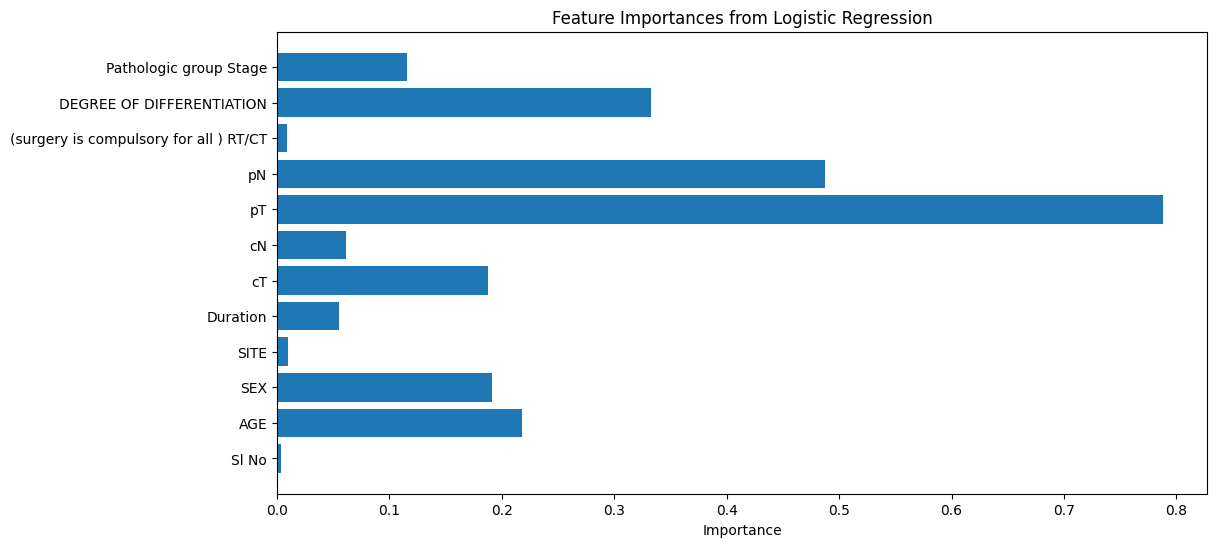

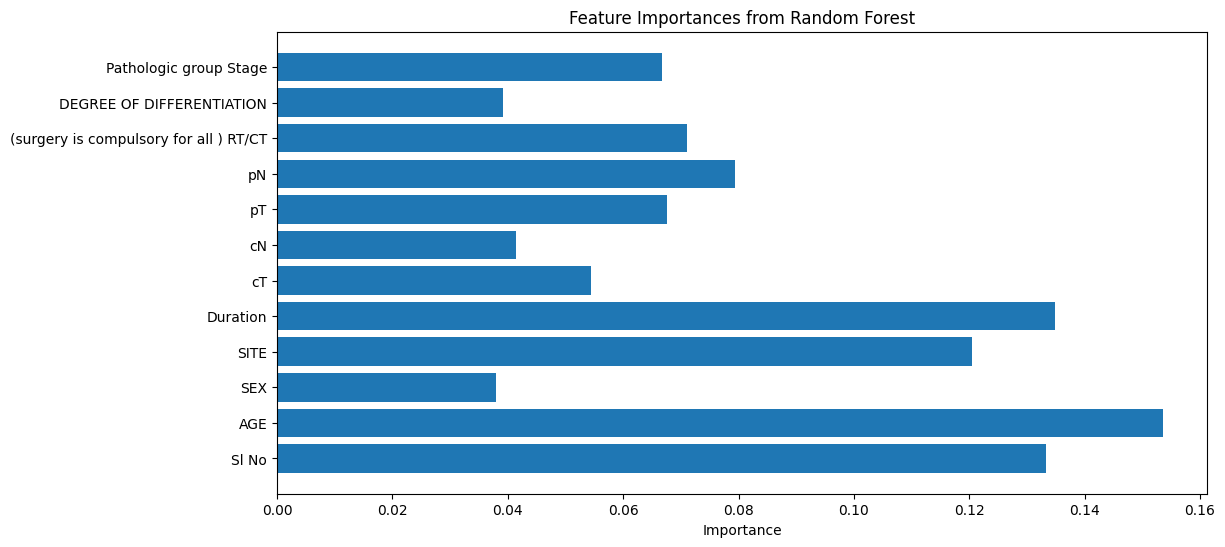

,Feature,Logistic Regression Importance,Random Forest Importance
1,AGE,0.218313,0.153522
4,Duration,0.055468,0.134934
0,Sl No,0.003903,0.133235
3,SITE,0.009527,0.120504
8,pN,0.487855,0.079398
9,(surgery is compulsory for all ) RT/CT,0.008629,0.071055
7,pT,0.787841,0.067637
11,Pathologic group Stage,0.115350,0.066712
5,cT,0.187376,0.054491
6,cN,0.061391,0.041370


In [24]:
#Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)# Get feature importances (coefficients)
log_feature_importances = np.abs(log_model.coef_[0])

#Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

#Getting feature importances
rf_feature_importances = rf_model.feature_importances_

#Feature names
feature_names = X.columns

#Plotting feature importances for Logistic Regression
plt.figure(figsize=(12, 6))
plt.barh(feature_names, log_feature_importances)
plt.xlabel('Importance')
plt.title('Feature Importances from Logistic Regression')
plt.show()

#Plotting feature importances for Random Forest
plt.figure(figsize=(12, 6))
plt.barh(feature_names, rf_feature_importances)
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.show()

#Display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Logistic Regression Importance': log_feature_importances,
    'Random Forest Importance': rf_feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Random Forest Importance', ascending=False)
feature_importance_df

In [25]:
#Loading the dataset
file_path = '/content/Dataset_OSCC (2) (1) (1).xlsx'
data = pd.read_excel(file_path)

#Removing spaces from column names
data.columns = data.columns.str.strip()
print(data.columns)

#Converting categorical columns to numeric using Label Encoding for simplicity
label_encoders = {}
categorical_columns = ['SEX', 'SITE', 'cT', 'cN', 'pT', 'pN', '(surgery is compulsory for all ) RT/CT', 'DEGREE OF DIFFERENTIATION', 'Pathologic group Stage']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

#Converting 'Duration' to numerical format
import re

def duration_to_days(duration):
    days = 0
    month_search = re.search(r'(\d+)\s*month', duration)
    if month_search:
        days += int(month_search.group(1)) * 30  # Approximate month to 30 days
    day_search = re.search(r'(\d+)\s*day', duration)
    if day_search:
        days += int(day_search.group(1))
    return days

data['Duration'] = data['Duration'].apply(duration_to_days)

#Feature Scaling
scaler = StandardScaler()
numerical_columns = ['AGE', 'Duration']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

#Splitting the dataset into training and testing sets
X = data.drop(columns=['Recurrence'])
y = data['Recurrence']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Training Logistic Regression model with increased max_iter
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

#Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)


Index(['Sl No', 'AGE', 'SEX', 'SITE', 'Duration', 'cT', 'cN', 'pT', 'pN',
       '(surgery is compulsory for all ) RT/CT', 'DEGREE OF DIFFERENTIATION',
       'Pathologic group Stage', 'Recurrence'],
      dtype='object')
Accuracy: 0.6521739130434783
Confusion Matrix:
[[10  2  3]
 [ 1  1  0]
 [ 1  1  4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.25      0.50      0.33         2
           2       0.57      0.67      0.62         6

    accuracy                           0.65        23
   macro avg       0.55      0.61      0.56        23
weighted avg       0.71      0.65      0.67        23

